# How to simulate

The unique feature of structural models compared to other econometric models is the ability to provide counterfactuals. There exist three different ways to simulate counterfactuals with ``respy``. Ordered from no data to a panel data on individuals, there is:

1. *n-step-ahead simulation without data*: The first observation of an individual is sampled from the initial conditions, i.e., the distribution of observed variables or initial experiences, etc. in the first period. Then, the individuals are guided for $n$ periods by the decision rules from the solution of the model.

2. *n-step-ahead simulation with first observations*: Instead of sampling individuals from the initial conditions, take the first observation of each individual in the data. Then, proceed as in 1..

3. *one-step-ahead simulation*: Take the complete data and find for each observation the corresponding outcomes, e.g, choices and wages, using the decision rules from the model solution.

In this notebook, you will learn how to use any of the three methods and what their purpose is. We take the basic model from Keane and Wolpin (1997) and their original data. We start with importing the model and data.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import respy as rp

params, options, df = rp.get_example_model("kw_97_basic")

## 1. n-step-ahead simulation without data

The first exercise is an *n-step-ahead simulation without data*. This method and the following *n-step-ahead simulation with first observations* are the cornerstone for providing predictions of behavior in counterfactural environments. The first observation of each individual is sampled from the initial conditions which need to be sufficiently specified. This comprises, for example, the distribution of observed variables, experiences and previous choices.

To reduce the complexity of the model, we reduce the model horizon to 12 periods. Note that the parameters belong to a model with fifty periods which distorts choice patterns for shorter time frames.

In [2]:
options["n_periods"] = 12

In [3]:
simulate = rp.get_simulate_func(params, options)

In [4]:
df_1 = simulate(params)

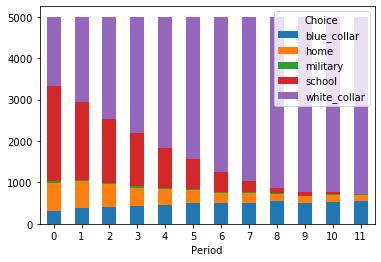

In [5]:
df_1.groupby("Period").Choice.value_counts().unstack().plot.bar(stacked=True, rot=0)

## 2. n-step-ahead simulation with first observations

The second variant of the n-step-ahead simulation does not require the information on the initial conditions. Instead, the first observations in the data are taken as the starting points for the simulation. Thus, restrict the data to first period and pass it to the constructor for the simulation function.

In [6]:
df_ = df.query("Period == 0")

In [7]:
simulate = rp.get_simulate_func(params, options, df_)

In [8]:
df_2 = simulate(params)

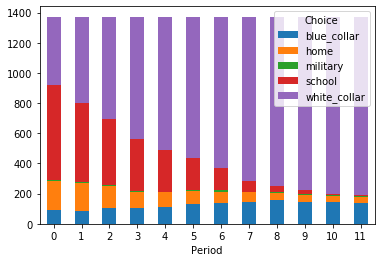

In [9]:
df_2.groupby("Period").Choice.value_counts().unstack().plot.bar(stacked=True, rot=0)

## 3. one-step-ahead simulation

The one-step-ahead simulation takes the data as given and simulates the outcomes for each observation. Thus, the original sample size is preserved.

In [10]:
simulate = rp.get_simulate_func(params, options, df)

In [11]:
df_3 = simulate(params)

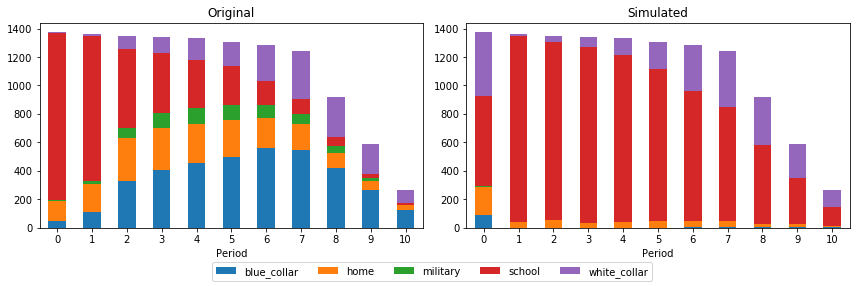

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

df.groupby("Period").Choice.value_counts().unstack().plot.bar(ax=axs[0], stacked=True, rot=0, legend=False, title="Original")
df_3.groupby("Period").Choice.value_counts().unstack().plot.bar(ax=axs[1], stacked=True, rot=0, title="Simulated")

handles, _ = axs[1].get_legend_handles_labels()
axs[1].get_legend().remove()

fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=5)

plt.tight_layout(rect=[0,0.05,1,1])